## ProblemStatment 2:
    Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [51]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import sklearn.tree as tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import LeaveOneOut,cross_val_score,KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

In [2]:
data_df = pd.read_csv('Fraud_check.csv')
data_df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
report = pp.ProfileReport(data_df)
report.to_widgets()

In [6]:

data_df = data_df.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1)
data_df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [24]:
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
data_df['TaxIncomeStatus']=''
data_df.loc[data_df.Taxable_Income <=30000,'TaxIncomeStatus']='Risky'
data_df.loc[data_df.Taxable_Income >30000,'TaxIncomeStatus']='Good'
data_df.TaxIncomeStatus   


0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxIncomeStatus, Length: 600, dtype: object

In [26]:
data_df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,TaxIncomeStatus
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [29]:
label_encoder = LabelEncoder()
data_df['Undergrad_Label']=label_encoder.fit_transform(data_df['Undergrad'])
data_df['Marital_Status_Label']=label_encoder.fit_transform(data_df['Marital_Status'])
data_df['Urban_Label']=label_encoder.fit_transform(data_df['Urban'])
data_df['TaxIncomeStatus_Label']=label_encoder.fit_transform(data_df['TaxIncomeStatus'])
data_df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,TaxIncomeStatus,Undergrad_Label,Marital_Status_Label,Urban_Label,TaxIncomeStatus_Label
0,NO,Single,68833,50047,10,YES,Good,0,2,1,0
1,YES,Divorced,33700,134075,18,YES,Good,1,0,1,0
2,NO,Married,36925,160205,30,YES,Good,0,1,1,0
3,YES,Single,50190,193264,15,YES,Good,1,2,1,0
4,NO,Married,81002,27533,28,NO,Good,0,1,0,0


In [35]:
data_df_new = data_df.iloc[:,[3,4,7,8,9,10]]
data_df_new.head()

,City_Population,Work_Experience,Undergrad_Label,Marital_Status_Label,Urban_Label,TaxIncomeStatus_Label
0,50047,10,0,2,1,0
1,134075,18,1,0,1,0
2,160205,30,0,1,1,0
3,193264,15,1,2,1,0
4,27533,28,0,1,0,0


In [49]:
#Feature Selection Model Validation

x = data_df_new.iloc[:,:-1]
y = data_df_new.iloc[:,-1]
model =DecisionTreeClassifier(criterion='gini')# as the dependent var is categorical so we can use either c5.0(entropy) or CART(gini impurities)
model.fit(x,y)
rfe = RFE(model)
rfe.fit(x,y)
print("Decession Tree Feature selection \n",model.feature_importances_)
print("Recursive Feature Selection Ranking ", rfe.ranking_,"\n Recursive Feature Selection Top Features ",rfe.support_)

Decession Tree Feature selection 
 [0.62597257 0.15656064 0.05767139 0.09633464 0.06346075]
Recursive Feature Selection Ranking  [1 1 3 2 4] 
 Recursive Feature Selection Top Features  [ True  True False False False]


In [60]:
featured_x = x.iloc[:,[0,1,3]]
X = StandardScaler().fit_transform(featured_x)
# Evaluate using Cross Validation when we have medium no. of dataset
num_folds=10
seed=30
kfold = KFold(n_splits=num_folds, random_state=seed)
modelBuilding = DecisionTreeClassifier(criterion='gini', max_depth=3)
modelBuilding.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print("Mean---",results.mean(),"\n Std Deviation----",results.std())


Mean--- 0.635 
 Std Deviation---- 0.04621808207954014


C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


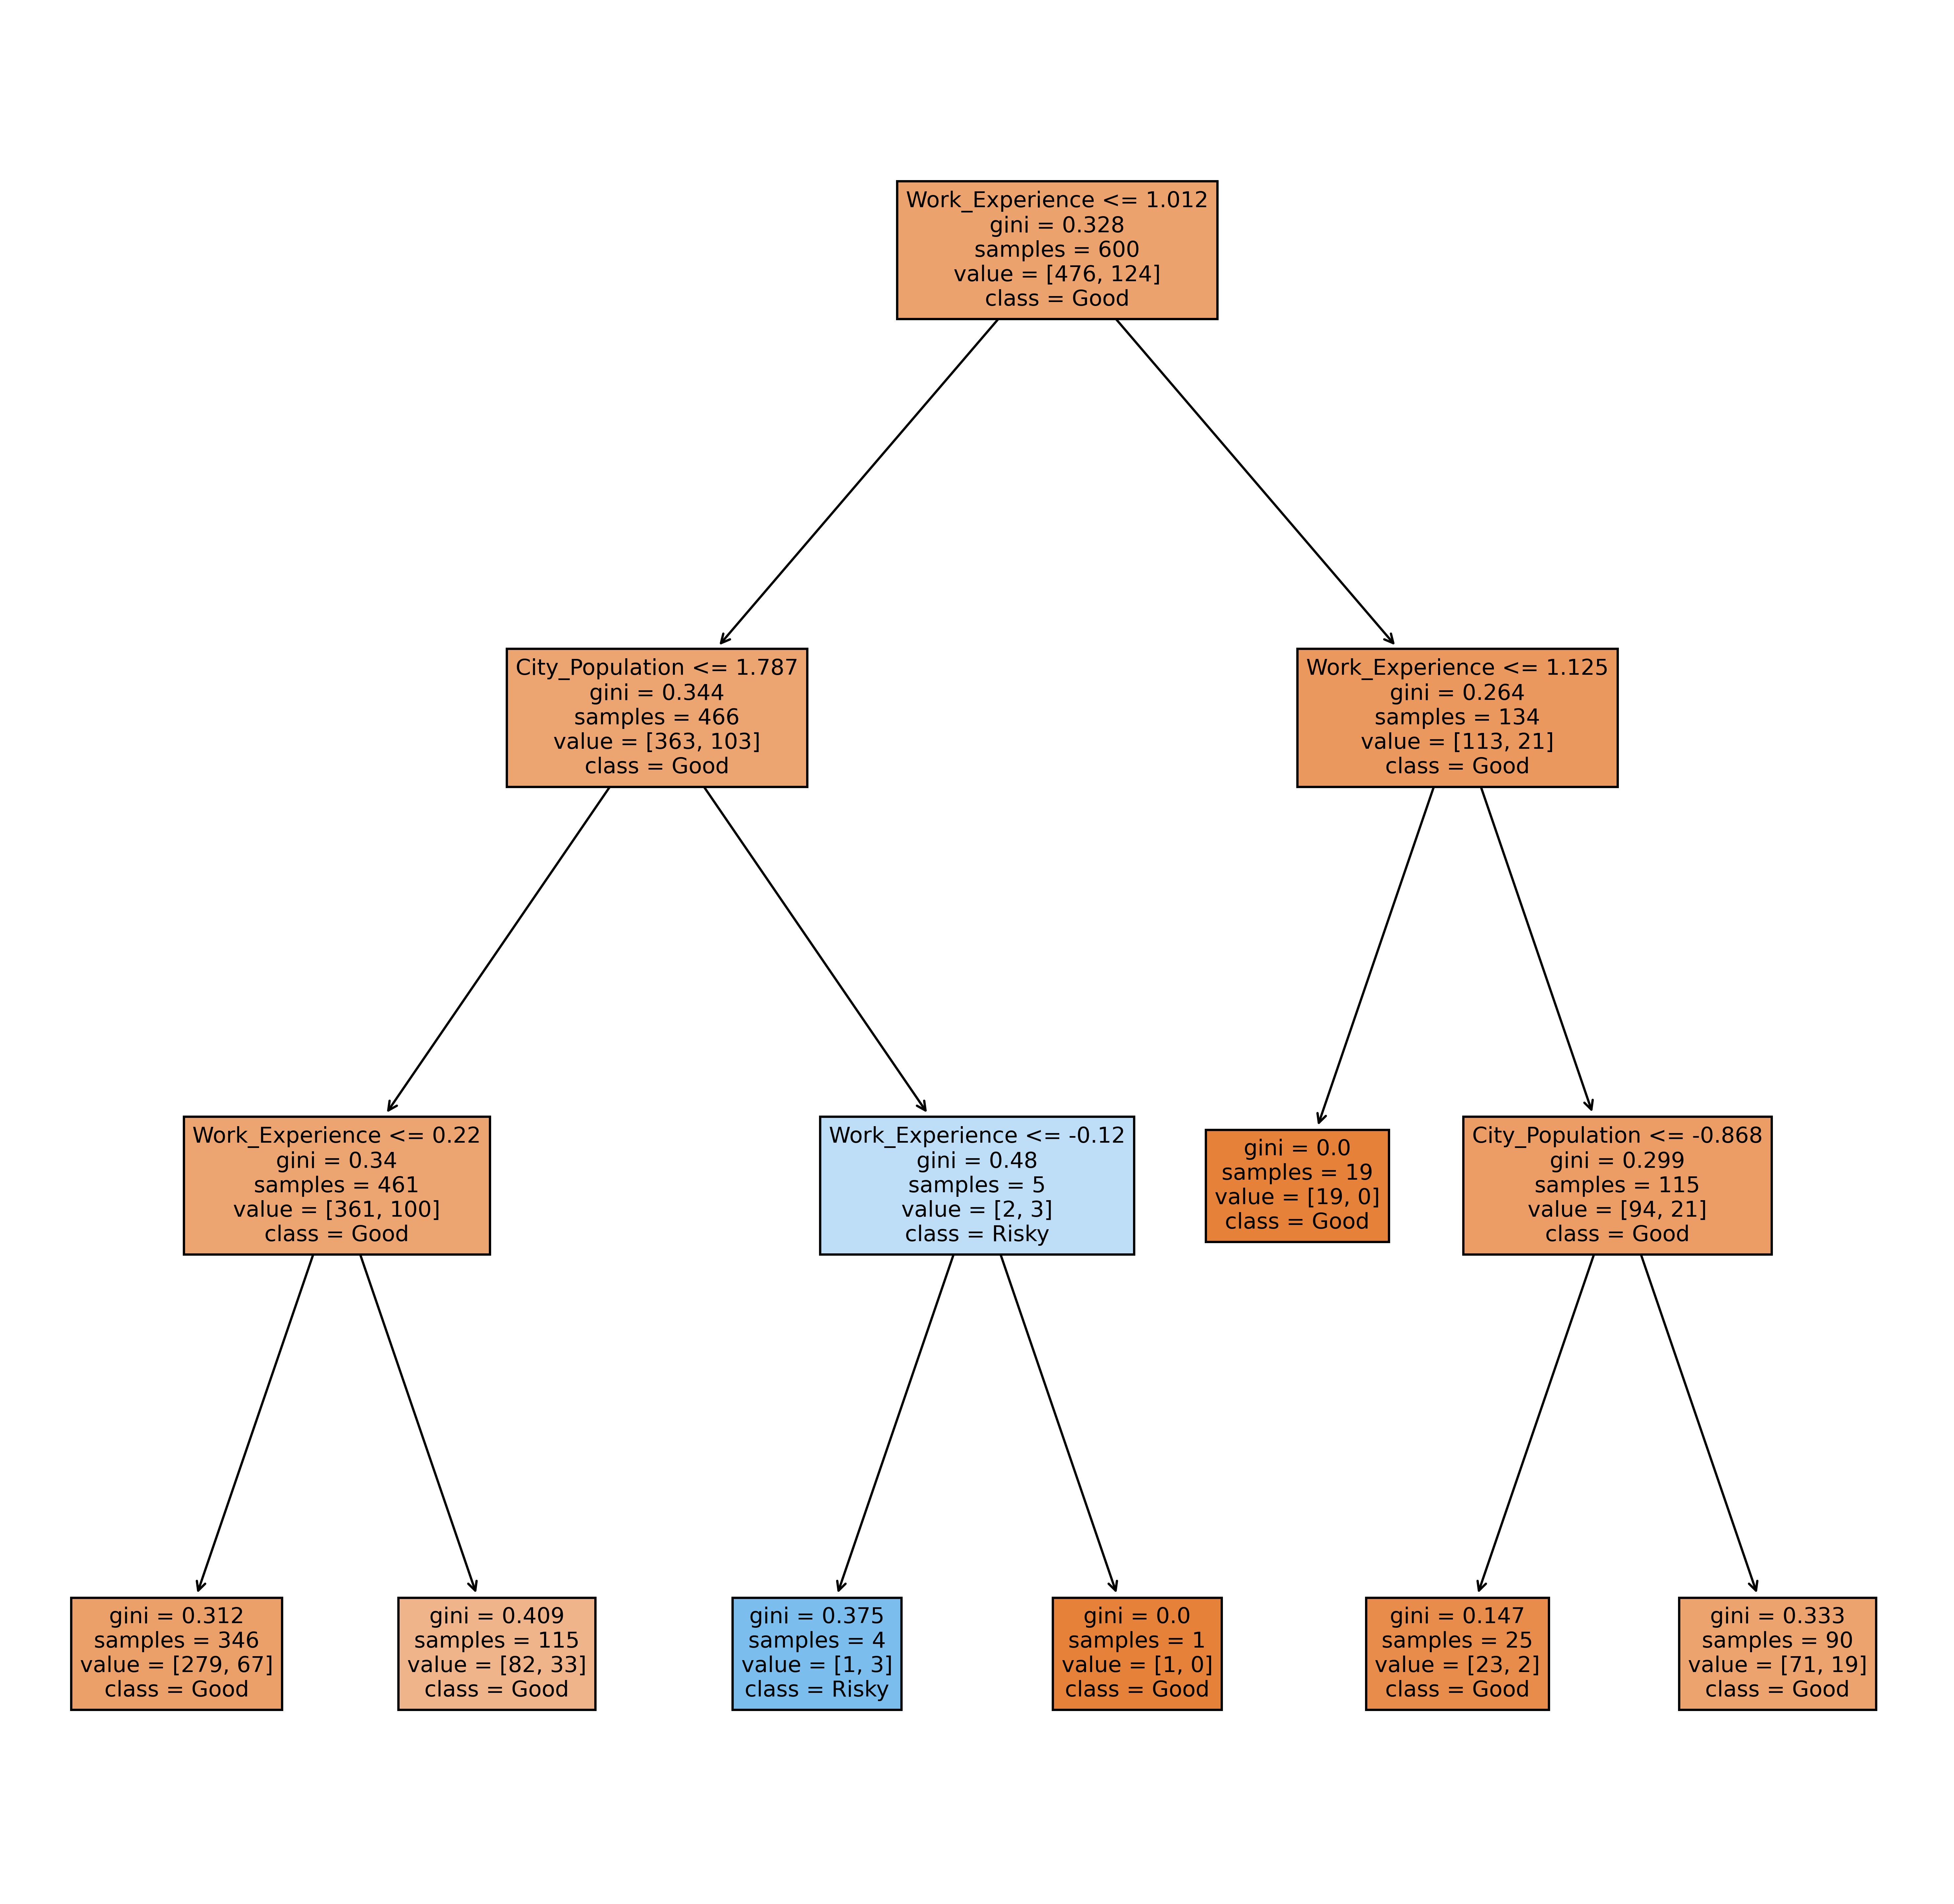

In [61]:
fig, axes = plt.subplots(figsize = (15,15), dpi=500)
tree.plot_tree(modelBuilding,feature_names=['City_Population','Work_Experience','Marital_Status_Label'],class_names=['Good','Risky'],filled=True)

plt.show()

In [62]:
results#individual model accuracy

array([0.7       , 0.6       , 0.58333333, 0.58333333, 0.61666667,
       0.58333333, 0.63333333, 0.7       , 0.66666667, 0.68333333])

In [64]:
modelBuilding.score(X,y)#Acuracy of the model

0.7966666666666666

In [65]:
print("Mean---",results.mean()*100,"\n Std Deviation----",results.std()*100)

Mean--- 63.5 
 Std Deviation---- 4.621808207954014


In [69]:
y_predict = modelBuilding.predict(X)
passedTest = data_df.iloc[np.where(y_predict==y)]
print("Total Test length is ",len(X),"\n Passed Test count is",len(passedTest))

Total Test length is  600 
 Passed Test count is 478


In [75]:
df = pd.DataFrame({'Predicted':y_predict,'Actual':y})
df

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
595,0,0
596,0,0
597,0,0
598,0,0


In [76]:
failed = data_df.iloc[np.where(y_predict!=y)]
print("Total Test length is ",len(data_df),"\n Passed Test count is",len(failed))

Total Test length is  600 
 Passed Test count is 122
